# Task 32-> Clustering (KMeans)

# 
Clustering with KMeans partitions a dataset into groups based on feature similarities. To use KMeans, 
choose a dataset and preprocess it, then apply the KMeans algorithm to group data points into clusters.
The Elbow Method helps determine the optimal number of clusters by plotting the within-cluster sum of 
squares against the number of clusters and finding the 'elbow point.' Once the optimal number is chosen,
use KMeans to segment the data. Visualize the clusters with scatter plots, using different colors to 
represent each cluster for clear and intuitive understanding.

### importing necessary libraries and dataset

In [24]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

file_path = r'C:\Users\Huawei\Desktop\Reg_EnergyData.csv'
data = pd.read_csv(file_path)

#### clustering based on all numerical columns

In [21]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


#### Standardizing the numerical features

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[numerical_columns])

### Determine the optimal number of clusters using the Elbow Method

In [51]:
wcss = []#wcss means with-in cluster sum of squares 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


C:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

### Plot the Elbow Method graph

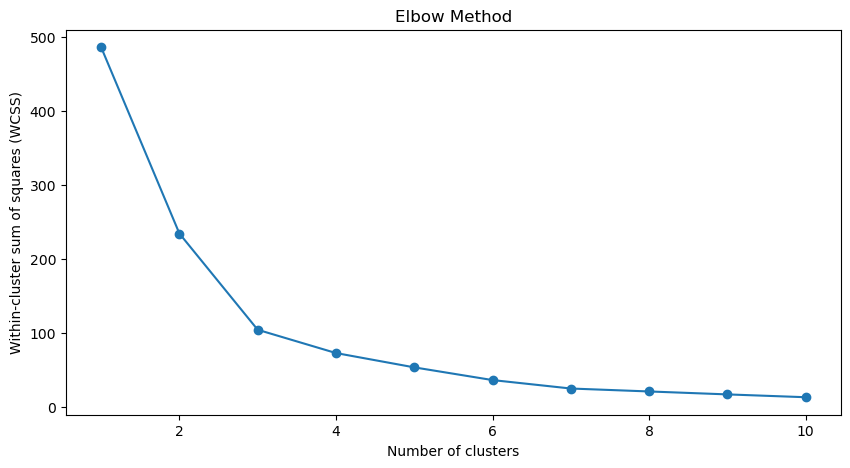

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.show()

### KMeans with the optimal number of clusters 

In [45]:
optimal_clusters = 3
# 3 number is determined by the elbow method graph and 3 is chosen because from this point WCSS (Within-Cluster Sum of Squares) start to decrease more slowly.

kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
#n_init=10 algorithm will be run 10 times with different initializations and will choose the best results i.e the one with smallest sum of distances between each clusters. 
#init=k-means++ helps pick better starting points for the clusters which usually leads to better results.

y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\Huawei\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Visualization based on the first two numerical features 

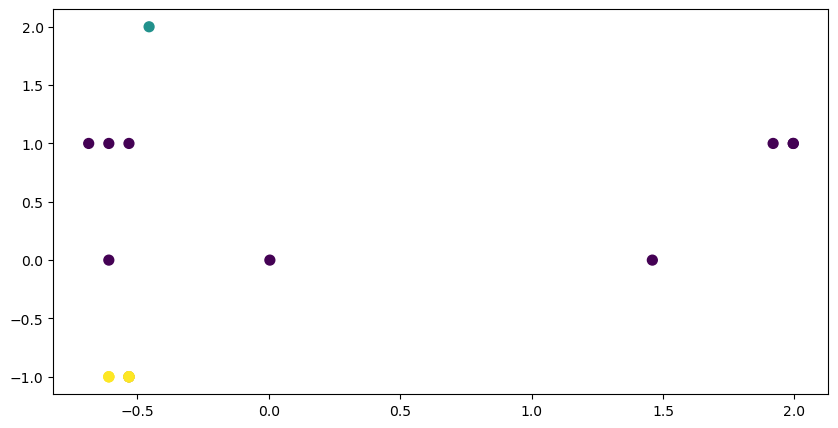

In [54]:
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50)
#c=y_kmeans each point's color is based on the cluster it belongs to. So 3 different colors are shown in the visualization as optimal clusters choosen are 3.


### Plotting the cluster centers

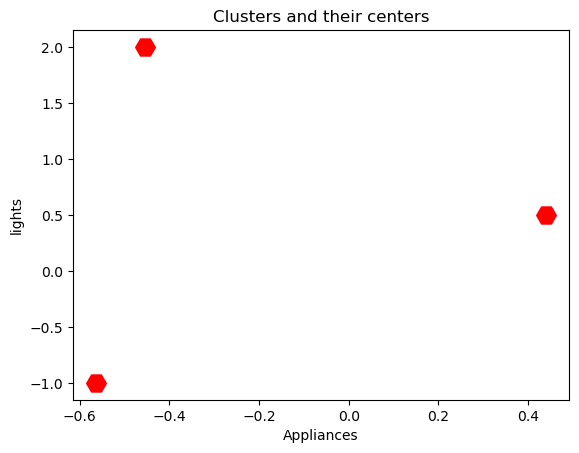

In [44]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='H')
plt.title('Clusters and their centers')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.show()